# These Visualisations explain Linear Regression better:
- Visual of a line fitting to a 2d plane on 1d input and 1d output
- Evolution of parameters (m and c) from a random initial value to a final value
- Decreasing Loss with every increasing iteration
- How we are approaching global minima using gradient descent in a convex function

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import time

# Set random seed for reproducibility
np.random.seed(42)

In [14]:
# Generate synthetic data
def generate_data(n_samples=30, noise=10):
    """Generate synthetic data with noise"""
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    true_m, true_c = 2.5, 7.0  # True parameters
    Y = true_m * X + true_c + noise * np.random.randn(n_samples, 1)
    return X, Y, true_m, true_c

In [15]:
# Mean Squared Error loss function
def compute_loss(X, Y, m, c):
    """Compute Mean Squared Error loss"""
    n_samples = X.shape[0]
    predictions = m * X + c  # Our linear model: y = mx + c
    loss = np.sum((predictions - Y) ** 2) / (2 * n_samples)
    return loss

In [16]:
# Compute gradients for gradient descent
def compute_gradients(X, Y, m, c):
    """Compute gradients for m and c parameters"""
    n_samples = X.shape[0]
    predictions = m * X + c
    
    # Partial derivatives
    dm = np.sum(X * (predictions - Y)) / n_samples
    dc = np.sum(predictions - Y) / n_samples
    
    return dm, dc

In [17]:
# Gradient descent function that stores history for visualization
def gradient_descent(X, Y, learning_rate=0.01, iterations=100):
    """Perform gradient descent and record progress"""
    # Initialize parameters
    m = 0
    c = 0
    
    # Initialize history for visualization
    m_history = [m]
    c_history = [c]
    loss_history = [compute_loss(X, Y, m, c)]
    
    # Gradient descent iterations
    for i in range(iterations):
        # Compute gradients
        dm, dc = compute_gradients(X, Y, m, c)
        
        # Update parameters using gradient descent
        m = m - learning_rate * dm
        c = c - learning_rate * dc
        
        # Store history
        m_history.append(m)
        c_history.append(c)
        loss_history.append(compute_loss(X, Y, m, c))
    
    return m, c, m_history, c_history, loss_history

In [73]:
# Generate our data
X, Y, true_m, true_c = generate_data(n_samples=30, noise=5)

# Run gradient descent
learning_rate = 0.001
iterations = 10000
final_m, final_c, m_history, c_history, loss_history = gradient_descent(X, Y, learning_rate, iterations)

In [74]:
# Now let's create visualizations to help understand what's happening

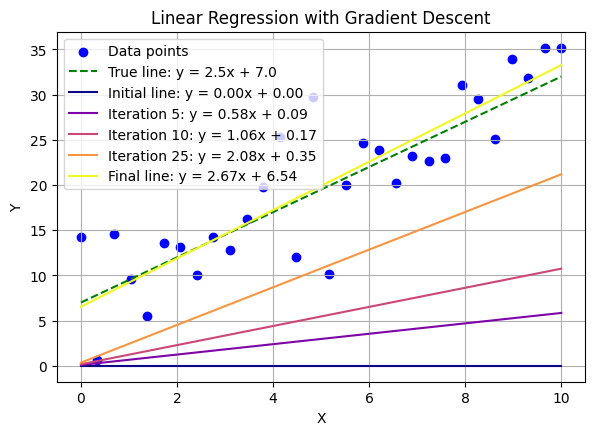

In [75]:
# 1. Plot the data points and the evolution of the regression line
plt.figure(figsize=(15, 10))

# Plot the data points
plt.subplot(2, 2, 1)
plt.scatter(X, Y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')

# Plot the true line
X_line = np.array([0, 10]).reshape(-1, 1)
Y_line = true_m * X_line + true_c
plt.plot(X_line, Y_line, color='green', linestyle='--', label=f'True line: y = {true_m}x + {true_c}')

# Plot initial, intermediate, and final lines
colors = plt.cm.plasma(np.linspace(0, 1, 5))
iterations_to_plot = [0, 5, 10, 25, iterations-1]

for i, iteration in enumerate(iterations_to_plot):
    if iteration < len(m_history):
        Y_pred = m_history[iteration] * X_line + c_history[iteration]
        label = 'Initial line' if iteration == 0 else 'Final line' if iteration == iterations-1 else f'Iteration {iteration}'
        plt.plot(X_line, Y_pred, color=colors[i], label=f'{label}: y = {m_history[iteration]:.2f}x + {c_history[iteration]:.2f}')

plt.legend()
plt.grid(True)

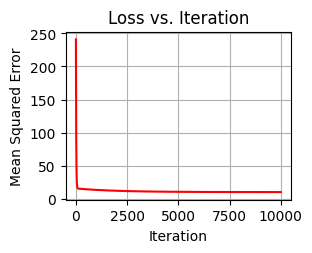

In [76]:
# 2. Plot the loss history
plt.subplot(2, 2, 2)
plt.plot(loss_history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Iteration')
plt.grid(True)

In [78]:
loss_history[-1]

np.float64(10.194866951148905)

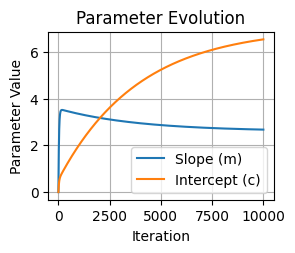

In [79]:
# 3. Plot the parameter evolution (m and c)
plt.subplot(2, 2, 3)
plt.plot(m_history, label='Slope (m)')
plt.plot(c_history, label='Intercept (c)')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Evolution')
plt.legend()
plt.grid(True)

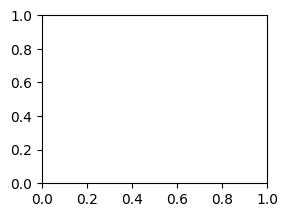

In [80]:
# 4. Plot the parameter space with contour lines for the loss function
plt.subplot(2, 2, 4)

# Create a grid of m and c values
m_range = np.linspace(-1, 5, 100)
c_range = np.linspace(0, 15, 100)
m_grid, c_grid = np.meshgrid(m_range, c_range)

# Compute loss for each (m, c) pair
loss_grid = np.zeros_like(m_grid)
for i in range(m_grid.shape[0]):
    for j in range(m_grid.shape[1]):
        loss_grid[i, j] = compute_loss(X, Y, m_grid[i, j], c_grid[i, j])

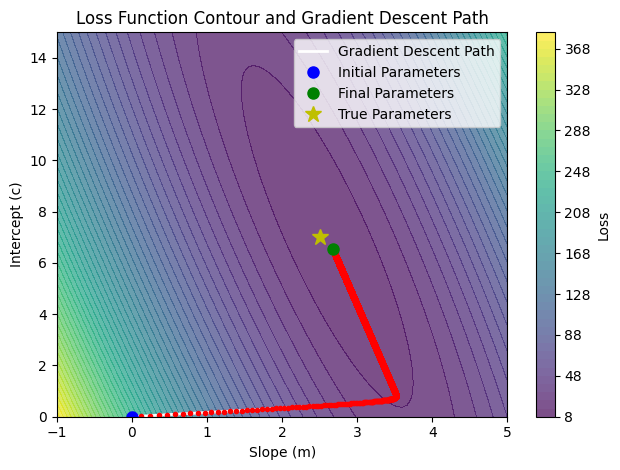

Final model: y = 2.6740x + 6.5378
True model: y = 2.5000x + 7.0000
Final loss: 10.1949


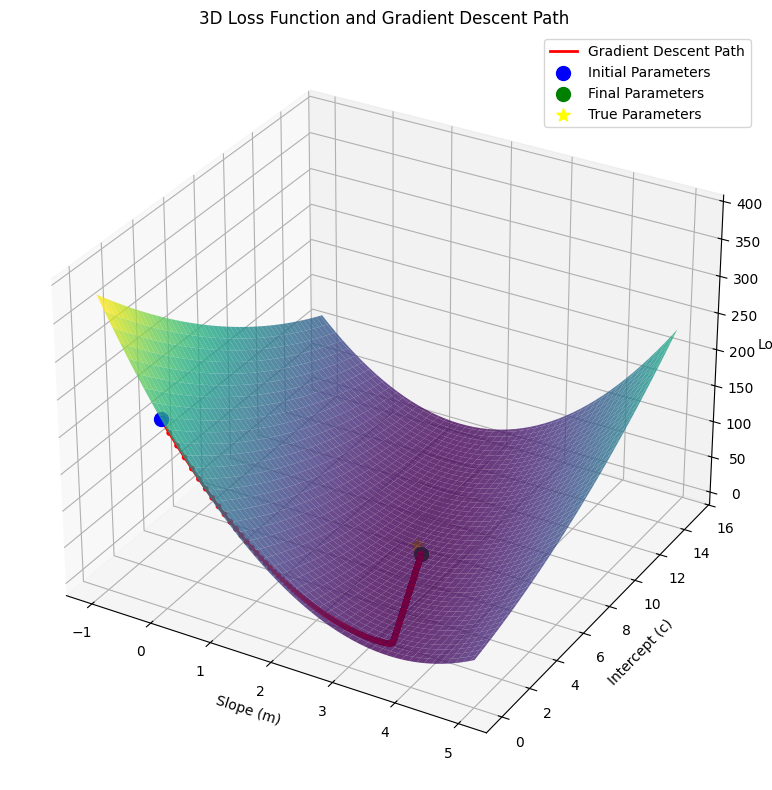

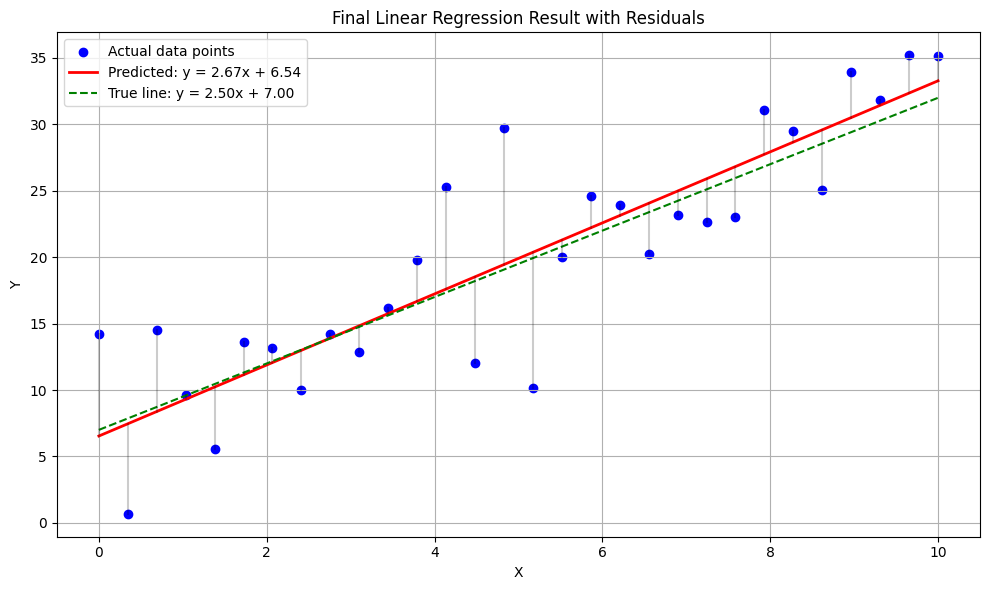

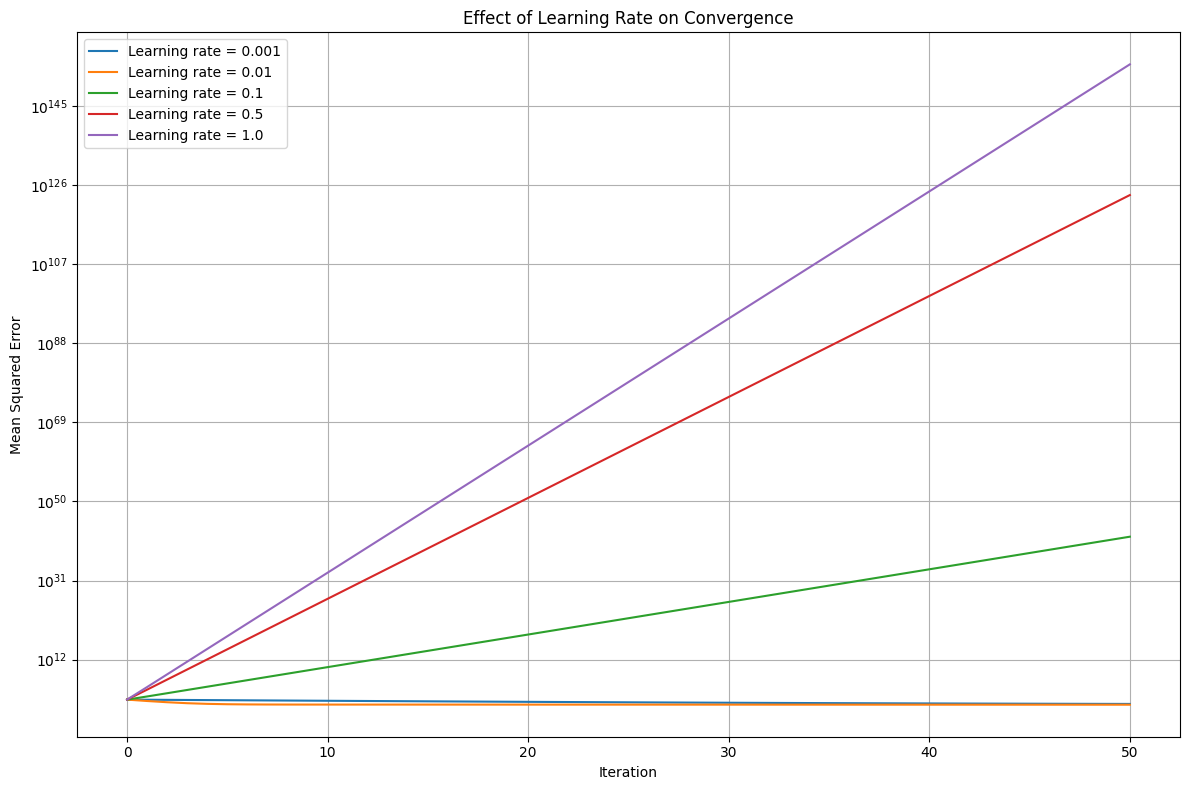

In [81]:
# Plot contour
plt.contourf(m_grid, c_grid, loss_grid, 50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Loss')

# Plot the path of gradient descent
plt.plot(m_history, c_history, 'w-', linewidth=2, label='Gradient Descent Path')
plt.plot(m_history, c_history, 'ro', markersize=3)
plt.plot(m_history[0], c_history[0], 'bo', markersize=8, label='Initial Parameters')
plt.plot(m_history[-1], c_history[-1], 'go', markersize=8, label='Final Parameters')
plt.plot(true_m, true_c, 'y*', markersize=12, label='True Parameters')

plt.xlabel('Slope (m)')
plt.ylabel('Intercept (c)')
plt.title('Loss Function Contour and Gradient Descent Path')
plt.legend()

plt.tight_layout()
plt.savefig('linear_regression_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# Now let's create an animation to see how the line evolves during gradient descent
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the data on the first subplot
ax1.scatter(X, Y, color='blue', label='Data points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Linear Regression Line Evolution')
ax1.grid(True)

# Set up the line that we'll update in the animation
line, = ax1.plot([], [], 'r-', label='Current line')

# True line
ax1.plot(X_line, Y_line, color='green', linestyle='--', label=f'True line: y = {true_m}x + {true_c}')
ax1.legend()

# Plot the parameter space on the second subplot
contour = ax2.contourf(m_grid, c_grid, loss_grid, 50, cmap='viridis', alpha=0.7)
plt.colorbar(contour, ax=ax2, label='Loss')

# Set up the path and current position that we'll update
path, = ax2.plot([], [], 'w-', linewidth=2)
current_pos, = ax2.plot([], [], 'ro', markersize=8)

ax2.plot(true_m, true_c, 'y*', markersize=12, label='True Parameters')
ax2.set_xlabel('Slope (m)')
ax2.set_ylabel('Intercept (c)')
ax2.set_title('Parameter Space')
ax2.legend()

# Set axis limits based on the parameters
ax2.set_xlim(min(m_history)-0.2, max(m_history)+0.2)
ax2.set_ylim(min(c_history)-0.2, max(c_history)+0.2)

# Function to initialize the animation
def init():
    line.set_data([], [])
    path.set_data([], [])
    current_pos.set_data([], [])
    return line, path, current_pos

# Animation update function
def update(frame):
    # Update the regression line
    y_pred = m_history[frame] * X_line + c_history[frame]
    line.set_data(X_line, y_pred)
    
    # Update the path in parameter space
    path.set_data(m_history[:frame+1], c_history[:frame+1])
    current_pos.set_data([m_history[frame]], [c_history[frame]])
    
    # Update the title with current parameters and loss
    ax1.set_title(f'Iteration {frame}: y = {m_history[frame]:.2f}x + {c_history[frame]:.2f}, Loss = {loss_history[frame]:.2f}')
    
    return line, path, current_pos

# Create the animation
ani = FuncAnimation(fig, update, frames=len(m_history), init_func=init,
                    blit=True, interval=100, repeat=False)

plt.tight_layout()
plt.savefig('linear_regression_animation_frame.png', dpi=300, bbox_inches='tight')
plt.close()  # Prevent the empty plot from showing

print(f"Final model: y = {final_m:.4f}x + {final_c:.4f}")
print(f"True model: y = {true_m:.4f}x + {true_c:.4f}")
print(f"Final loss: {loss_history[-1]:.4f}")

# Let's also create a 3D visualization of the loss function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D surface
surf = ax.plot_surface(m_grid, c_grid, loss_grid, cmap='viridis', alpha=0.8, 
                       linewidth=0, antialiased=True)

# Plot the gradient descent path
ax.plot(m_history, c_history, loss_history, 'r-', linewidth=2, label='Gradient Descent Path')
ax.scatter(m_history, c_history, loss_history, c='r', s=10)

# Mark the starting point
ax.scatter(m_history[0], c_history[0], loss_history[0], 
           c='blue', s=100, label='Initial Parameters')

# Mark the final point
ax.scatter(m_history[-1], c_history[-1], loss_history[-1], 
           c='green', s=100, label='Final Parameters')

# Mark the true parameters
true_loss = compute_loss(X, Y, true_m, true_c)
ax.scatter(true_m, true_c, true_loss, 
           c='yellow', s=100, marker='*', label='True Parameters')

ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (c)')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Function and Gradient Descent Path')
ax.legend()

plt.tight_layout()
plt.savefig('linear_regression_3d_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# Finally, let's visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))

# Sort X for smooth line
X_sorted = np.sort(X, axis=0)
Y_pred_sorted = final_m * X_sorted + final_c

plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X_sorted, Y_pred_sorted, color='red', linewidth=2, label=f'Predicted: y = {final_m:.2f}x + {final_c:.2f}')
plt.plot(X_line, Y_line, color='green', linestyle='--', label=f'True line: y = {true_m:.2f}x + {true_c:.2f}')

# Calculate and show residuals
for i in range(len(X)):
    y_pred = final_m * X[i] + final_c
    plt.plot([X[i], X[i]], [Y[i], y_pred], 'k-', alpha=0.2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Linear Regression Result with Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('linear_regression_final_fit.png', dpi=300, bbox_inches='tight')
plt.show()

# Let's also visualize how different learning rates affect convergence
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
iterations_lr = 50

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    # Run gradient descent with this learning rate
    _, _, _, _, loss_hist = gradient_descent(X, Y, learning_rate=lr, iterations=iterations_lr)
    plt.plot(loss_hist, label=f'Learning rate = {lr}')

plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale to better see differences

plt.tight_layout()
plt.savefig('linear_regression_learning_rates.png', dpi=300, bbox_inches='tight')
plt.show()